<a href="https://colab.research.google.com/github/cwhaley9/MusicGenreClassifier/blob/main/COMP562_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [422]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score

# Make sure you have the csv in the same directory
dataset = pd.read_csv('music_dataset.csv') # load data set in from csv

dataset.head() # check that data is imported

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


Check info for null values as this could impact model training and accuracy.

In [423]:
dataset.info() # get info on dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [424]:
dataset.isnull().sum() # check null values

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Let's drop any rows with null values.

In [425]:
dataset.dropna(subset=['artists', 'album_name', 'track_name'], inplace=True)
dataset.isnull().sum() # check null values again

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

The original dataset comes with genres that are too specific to accurately predict. Let's drop any genres that would generally fall under another genre.

In [426]:
genres_to_drop = ['acoustic','alternative','afrobeat','alt-rock','ambient','anime','black-metal','bluegrass','blues','brazil','breakbeat','british','cantopop','chicago-house','children','chill','club','comedy','dancehall','death-metal','deep-house','detroit-techno','disney','drum-and-bass','dub','dubstep','edm','electro','emo','folk','forro','french','funk','garage','german','gospel','goth','grindcore','groove','grunge','guitar','happy','hard-rock','hardcore','hardstyle','heavy-metal','honky-tonk','idm','indian','indie-pop','indie','industrial','iranian','j-dance','j-idol','j-pop','j-rock','k-pop','kids','latin','latino','malay','mandopop','metalcore','minimal-techno','mpb','new-age','opera','pagode','party','piano','pop-film','power-pop','progressive-house','psych-rock','punk-rock','punk','reggae','reggaeton','rock-n-roll','rockabilly','romance','sad','salsa','samba','sertanejo','show-tunes','singer-songwriter','ska','sleep','songwriter','soul','spanish','study','swedish','synth-pop','tango','techno','trance','trip-hop','turkish','world-music']

In [427]:
dataset.drop(dataset[dataset['track_genre'].isin(genres_to_drop)].index, inplace = True)
dataset.drop(columns = ['Unnamed: 0'], inplace = True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 16000 to 91999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          12000 non-null  object 
 1   artists           12000 non-null  object 
 2   album_name        12000 non-null  object 
 3   track_name        12000 non-null  object 
 4   popularity        12000 non-null  int64  
 5   duration_ms       12000 non-null  int64  
 6   explicit          12000 non-null  bool   
 7   danceability      12000 non-null  float64
 8   energy            12000 non-null  float64
 9   key               12000 non-null  int64  
 10  loudness          12000 non-null  float64
 11  mode              12000 non-null  int64  
 12  speechiness       12000 non-null  float64
 13  acousticness      12000 non-null  float64
 14  instrumentalness  12000 non-null  float64
 15  liveness          12000 non-null  float64
 16  valence           12000 non-null  fl

As displayed below, our data is balanced with each of our 12 major genres having an equal proportion of samples.

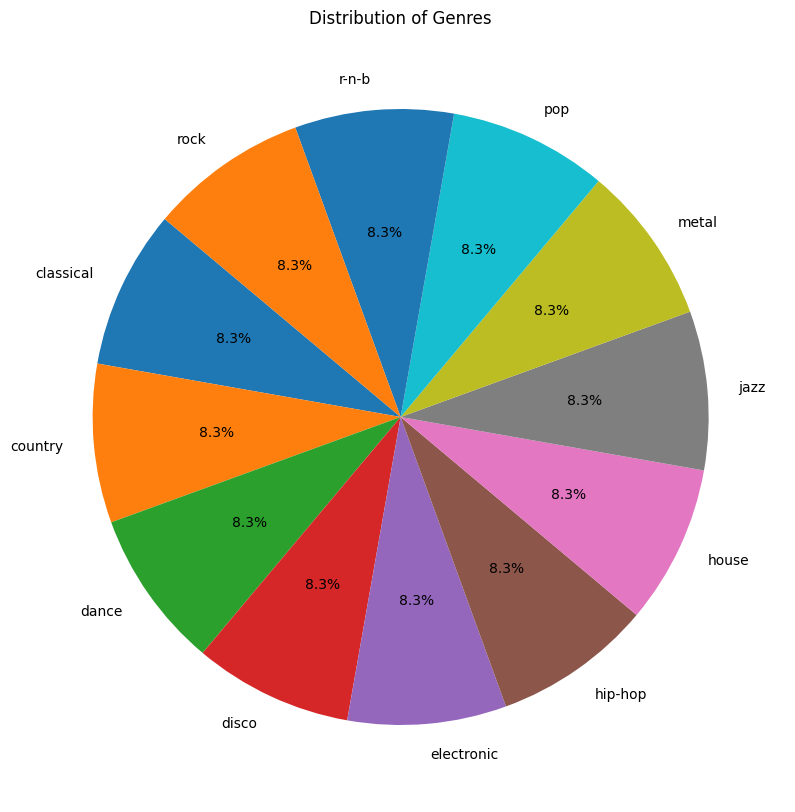

In [428]:
genre_counts = dataset['track_genre'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Genres')
plt.show()

Using histograms, we can display the distribution of each of our features.

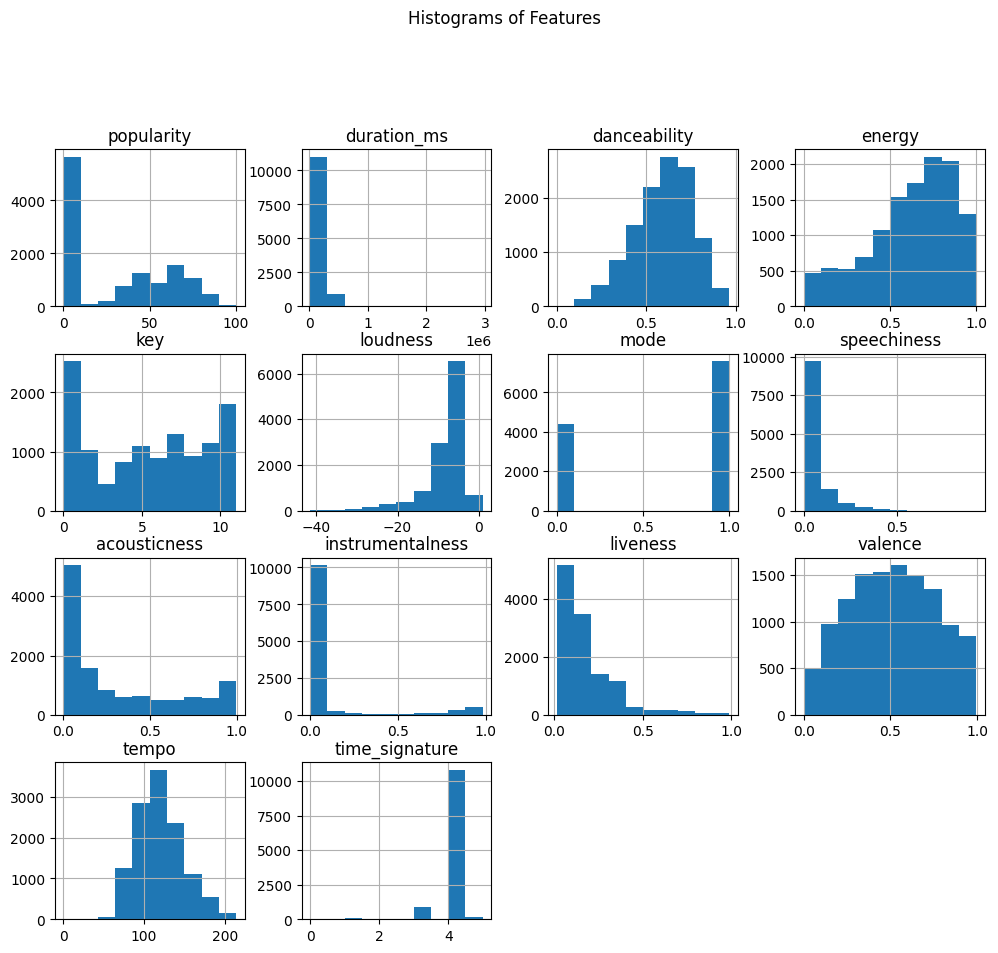

In [429]:
dataset.hist(figsize=(12, 10))
plt.suptitle('Histograms of Features', y=1.02)
plt.show()

We cut our dataset down to 12,000 entries with 12 genres to classify from. Now we can prepare features and target.

In [430]:
# features (numerical variables not including target variable)
X = dataset[['popularity','duration_ms','explicit','danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','time_signature']]

# target variable
y = dataset['track_genre']

rs = 37 # store random state for reproducible results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=rs) # split data up into a training set (75%) and test set (25%)


Create a model to train by passing in our training data.

For genre classification, we will use a random forest classifier.
This will allow us to:

* Combine predictions from multiple decision trees
*   Use our features to branch to nodes in trees
*   Classify genre based on leaf node selection
*   Recursively process each subset of nodes, trees
* mitigate overfitting

Using a random forest, we will have a clear visualization of the model's path to a decision. We will be able to recognize our model's misclassifications.







In [431]:
# we can alter parameters if it will optimize accuracy
minSamplesSplit = 5
maxDepth = 15
minSamplesLeaf = 30
nEstimators = 200

rfModel = RandomForestClassifier(n_estimators = nEstimators, random_state = rs)

Fit the model with our training set of features and our training set of target variables.

In [432]:
rfModel.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=37)

Gather the model's predictions using the X_test data

In [433]:
predictions = rfModel.predict(X_test)

Now that we have the model's predictions, we can compare them to the real values (in y_test) and determine an accuracy score based on how often the model had a correct prediction. Our ROC-AUC score tells us how well the model discriminated between each class, and in this case, genre.

Accuracy: 0.6676666666666666
roc_auc_score: 0.9486330581131189
Confusion Matrix: 


<Axes: >

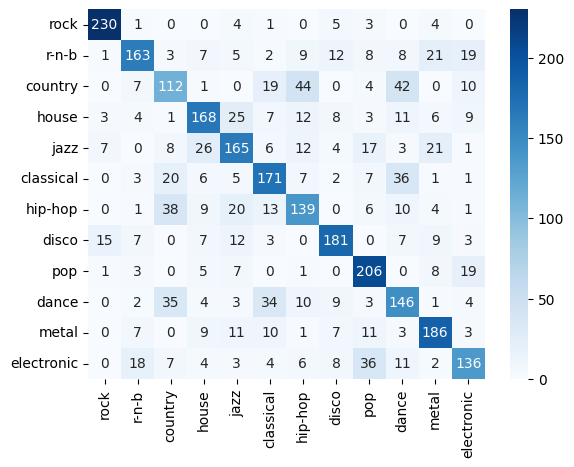

In [434]:
accuracy = accuracy_score(y_test, predictions)
conMatrix = confusion_matrix(y_test, predictions)

print(f'Accuracy: {accuracy}')

predictions_prob = rfModel.predict_proba(X_test)
roc_score = roc_auc_score(y_test, predictions_prob, multi_class = 'ovr')
print(f'roc_auc_score: {roc_score}')

classLabels = set(dataset['track_genre']) # get set of genres to plot on each axis

print(f'Confusion Matrix: ')
sb.heatmap(conMatrix, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = classLabels, yticklabels = classLabels)

Below, we print a report of how well our model handled each genre by displaying precision, recall, f1-score, and support.

In [435]:
print(f'classificationsReport:')
print(classification_report(y_test, predictions))

classificationsReport:
              precision    recall  f1-score   support

   classical       0.89      0.93      0.91       248
     country       0.75      0.63      0.69       258
       dance       0.50      0.47      0.48       239
       disco       0.68      0.65      0.67       257
  electronic       0.63      0.61      0.62       270
     hip-hop       0.63      0.66      0.65       259
       house       0.58      0.58      0.58       241
        jazz       0.77      0.74      0.75       244
       metal       0.68      0.82      0.74       250
         pop       0.53      0.58      0.55       251
       r-n-b       0.71      0.75      0.73       248
        rock       0.66      0.58      0.62       235

    accuracy                           0.67      3000
   macro avg       0.67      0.67      0.67      3000
weighted avg       0.67      0.67      0.67      3000



We will now plot our features in descending order of importance.

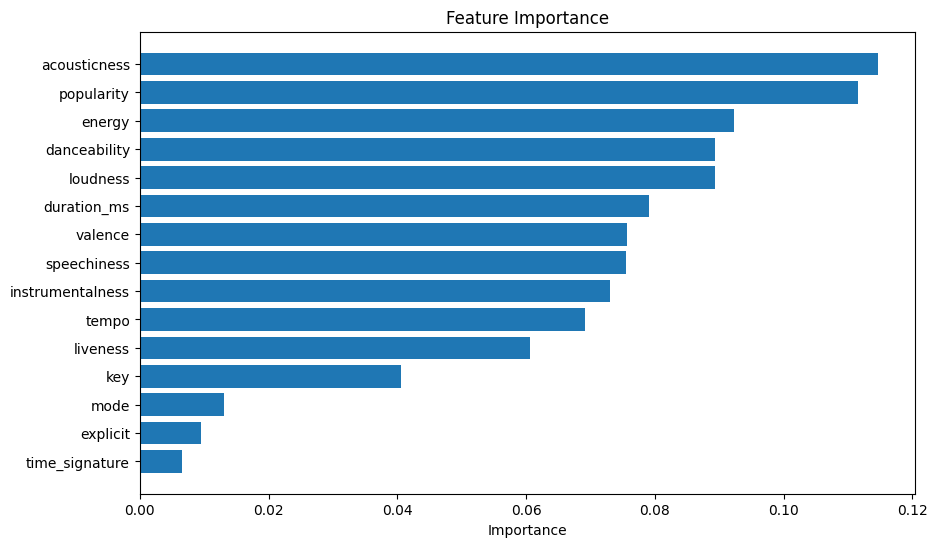

In [436]:
# Retrieve data for how important each feature is
feature_importance = rfModel.feature_importances_

# Create visual display (data frame)
feature_importance_visual = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Determine most important features by sorting
feature_importance_visual = feature_importance_visual.sort_values(by='Importance', ascending=True)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_visual['Feature'], feature_importance_visual['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

The feature importance graph tells us that acousticness and popularity are the most significant features in determining genre; mode, explicit, and time_signature are the least significant features in determining genre.